In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

from capstone.utils import miccai, visualize
from capstone.paths import DEFAULT_DATA_STORAGE

In [2]:
sample = DEFAULT_DATA_STORAGE + "/miccai/train/0522c0017/"

patient = miccai.Patient(sample)
# patient.meta_data

In [3]:
# patient.image

In [4]:
# Equivalent to patient.structures["Parotid_L"]
# patient.structures.Parotid_L

In [5]:
patient.num_slides

156

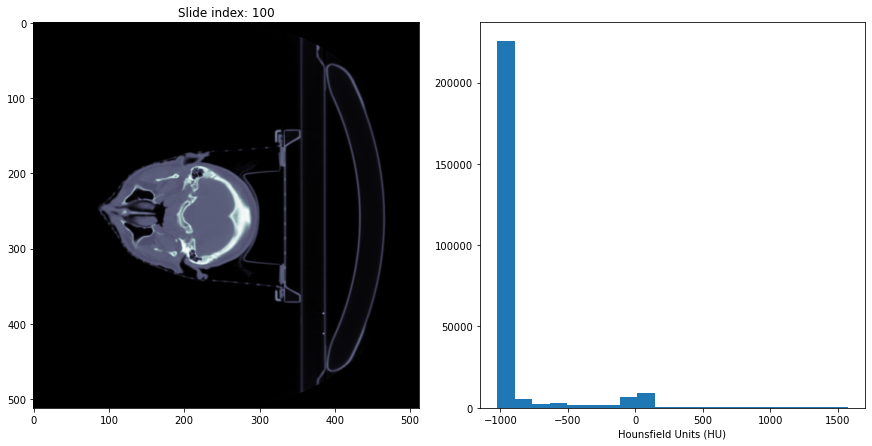

In [6]:
_ = visualize.plot_slide(patient, index=100)

In [7]:
_ = visualize.notebook_interact(patient)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=155), SelectMultipl…

In [8]:
patient.crop_data()
patient.image.as_numpy().shape

(1, 105, 280, 280)

In [9]:
_ = visualize.notebook_interact(patient)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=104), SelectMultipl…

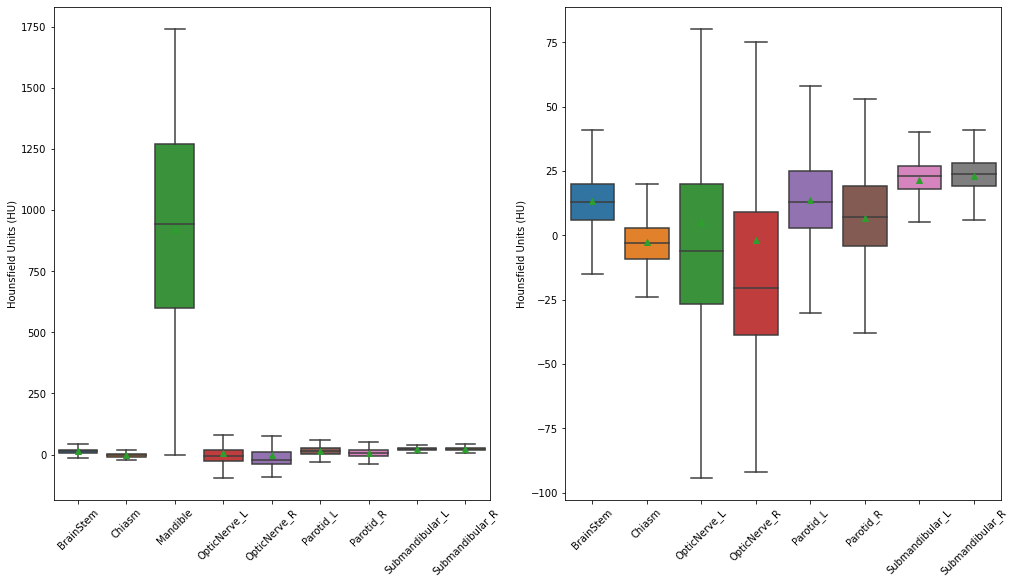

In [10]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(14, 8))

_ = visualize.plot_region_distribution(patient, ax=axes[0])
_ = visualize.plot_region_distribution(patient, exclude=["Mandible"], ax=axes[1])

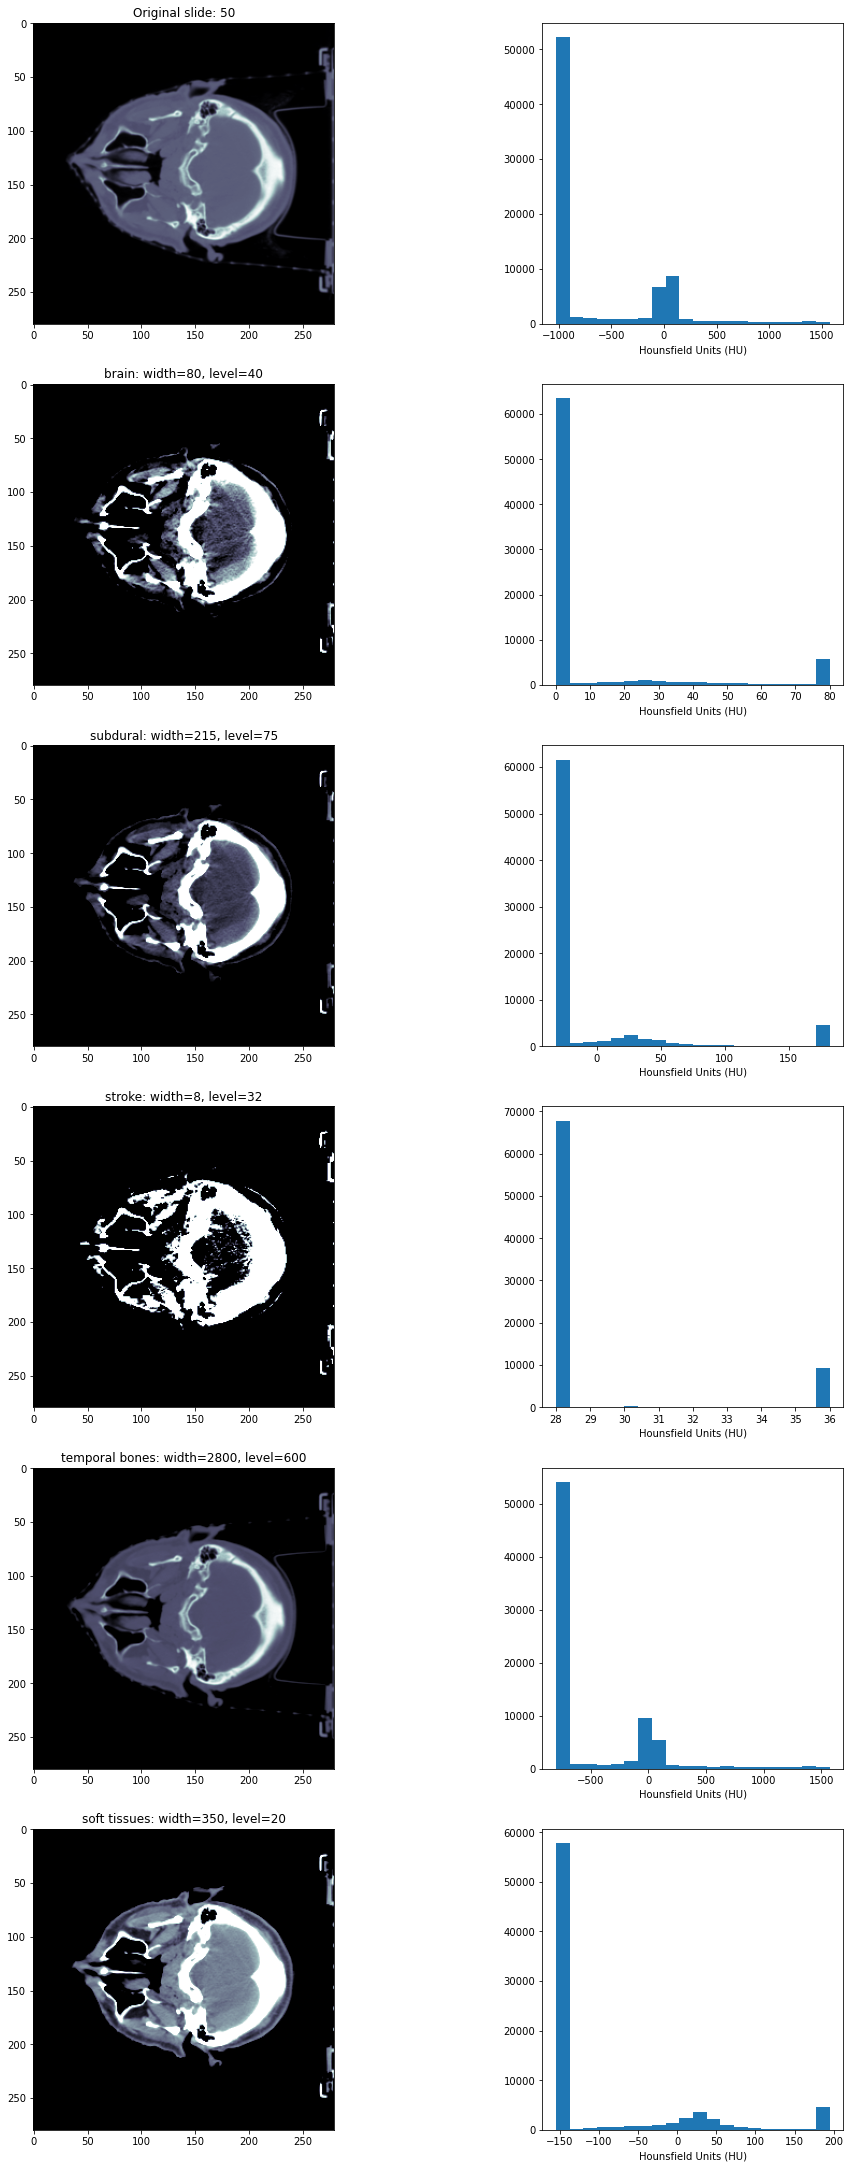

In [11]:
_ = visualize.plot_windowed(patient, index=50)

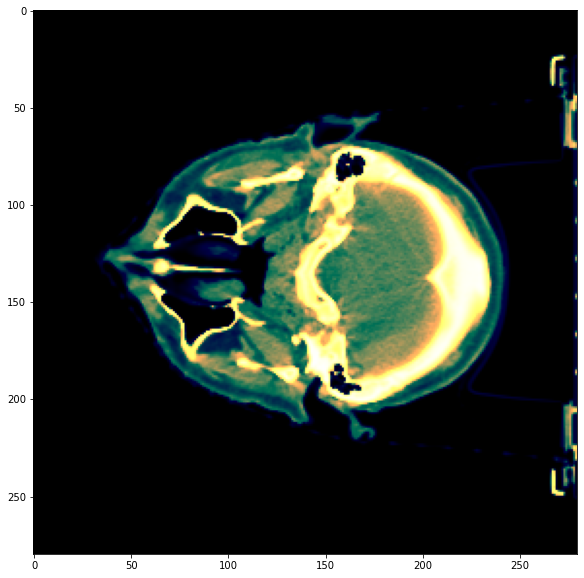

In [12]:
index = 50

combined_volume = np.zeros((*patient.image.as_numpy()[0][index].shape, 3))
combined_volume[:, :, 0] = visualize._window_volume(patient, 80, 40)[0][index]
combined_volume[:, :, 1] = visualize._window_volume(patient, 350, 20)[0][index]
combined_volume[:, :, 2] = visualize._window_volume(patient, 2800, 600)[0][index]

min_ = combined_volume.min(axis=(0, 1), keepdims=True)
max_ = combined_volume.max(axis=(0, 1), keepdims=True)

combined_volume = (combined_volume - min_) / (max_ - min_)

plt.figure(figsize=(10, 10))
plt.imshow(combined_volume, cmap=plt.cm.bone)
plt.show()